In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.preprocessing import LabelEncoder

def fillna(df) :
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

def drop_features(df) :
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

def format_features(df) :
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
titanic_df = pd.read_csv("./dataset/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_df = transform_features(X_titanic_df) # 만들어둔 전처리 함수 적용

# titanic_test_df = pd.read_csv("./dataset/titanic_test.csv")
# y_titanic_test_df = titanic_test_df["Survived"]   # 레이블 데이터 셋 추출
# X_titanic_test_df = titanic_test_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

# X_titanic_test_df = transform_features(X_titanic_test_df) # 만들어둔 전처리 함수 적용

In [11]:
#titanic_df = pd.read_csv("./dataset/titanic_train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [6]:
titanic_clf = DecisionTreeClassifier(random_state=121) #머신러닝 알고리즘 생성 
titanic_clf.fit(X_titanic_df, y_titanic_df) #모델 학습 

DecisionTreeClassifier(random_state=121)

Feature Importance : [0.082 0.306 0.271 0.041 0.019 0.208 0.051 0.021]
Pclass : 0.082
Sex : 0.306
Age : 0.271
SibSp : 0.041
Parch : 0.019
Fare : 0.208
Cabin : 0.051
Embarked : 0.021


<AxesSubplot:>

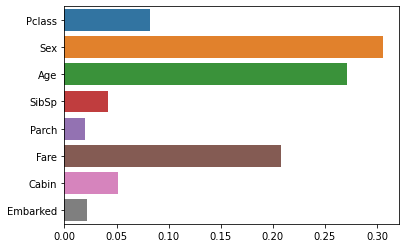

In [7]:
# feature importance 추출
print(f"Feature Importance : {np.round(titanic_clf.feature_importances_, 3)}")

# feature 별 importance 매핑
features = []
for name, value in zip(X_titanic_df.columns, titanic_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})

# feature importance를 column별로 시각화 하기
sns.barplot(x=titanic_clf.feature_importances_, y=X_titanic_df.columns)

In [13]:
titanic_lr = LogisticRegression()
titanic_lr.fit(X_titanic_df, y_titanic_df)
pred_all = titanic_lr.predict(X_titanic_df)
print(f'정확도 검정: {np.round(accuracy_score(y_titanic_df, pred_all),3)}')

정확도 검정: 0.792


C:\Users\JIHYUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
X_train_feat = X_titanic_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]


titanic_test_df = pd.read_csv("./dataset/titanic_test.csv")
y_titanic_test_df = titanic_test_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_test_df = titanic_test_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제
X_titanic_test_df = transform_features(X_titanic_test_df) # 만들어둔 전처리 함수 적용

X_test_feat = X_titanic_test_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]

In [22]:
titanic_lr_feat = LogisticRegression()
titanic_lr_feat.fit(X_train_feat, y_titanic_df)
pred_feat = titanic_lr_feat.predict(X_test_feat)
print(f'정확도 검정: {np.round(accuracy_score(y_titanic_test_df, pred_feat),3)}')

정확도 검정: 0.95
